# Аппроксимация функции

$$ f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) $$

In [1]:
import numpy as np
import scipy
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
# исходная функция, вычисление значений
def our_func(x):
    return (np.sin(x/5.0))*(np.exp(x/10.0)) + 5*(np.exp(-x/2.0))

 ## система линейных уравнений для многочлена первой степени

In [3]:
val_1 = our_func(1)
val_2 = our_func(15)

In [4]:
print val_1, val_2

3.252216865271419 0.6352214195786656


$$ w0 + w1 = 3.252216865271419 $$
$$ w0 + 15*w1 = 0.6352214195786656$$

In [5]:
a = np.array([[1,1],[1,15]])
b = np.array([val_1, val_2])
print "Матрица A:\n", a
print "Вектор b:\n", b

Матрица A:
[[ 1  1]
 [ 1 15]]
Вектор b:
[3.25221687 0.63522142]


In [6]:
w1 = scipy.linalg.solve(a, b)
print "Решение системы:\n", w1

Решение системы:
[ 3.43914511 -0.18692825]


#### полученный многочлен

$$ f(x) = 3.43914511 - 0.18692825(x) $$

In [7]:
fa_1 = lambda x: w1[0] + w1[1] * x

#### Графики исходной и полученой функций

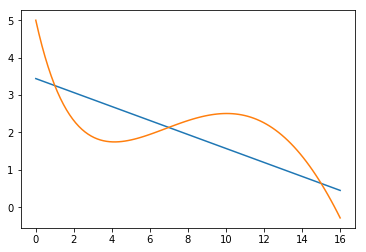

In [8]:
fig = plt.subplots()
x = np.linspace(0, 16, 100)
plt.plot(x, fa_1(x))
plt.plot(x, our_func(x))
plt.show()

 ## система линейных уравнений для многочлена второй степени

In [9]:
val_21 = our_func(1)
val_22 = our_func(8)
val_23 = our_func(15)

In [10]:
print val_21, val_22, val_23

3.252216865271419 2.316170159053224 0.6352214195786656


$$ w0 + w1 + w2 = 3.252216865271419 $$
$$ w0 + 8*w1 + 64*w2 = 2.316170159053224$$
$$ w0 + 15*w1 + 225*w2 = 0.6352214195786656$$

In [11]:
a = np.array([[1,1,1],[1,8,64],[1,15,225]])
b = np.array([val_21, val_22, val_23])
print "Матрица A:\n", a
print "Вектор b:\n", b

Матрица A:
[[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
Вектор b:
[3.25221687 2.31617016 0.63522142]


In [12]:
w2 = scipy.linalg.solve(a, b)
print "Решение системы:\n", w2

Решение системы:
[ 3.32512949 -0.06531159 -0.00760104]


#### полученный многочлен

$$ f(x) = 3.32512949 - 0.06531159(x) -  0.00760104(x*x)$$

In [13]:
fa_2 = lambda x: w2[0] + w2[1] * x + w2[2]*x*x

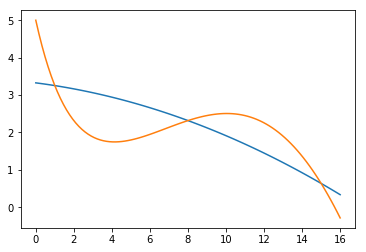

In [14]:
fig = plt.subplots()
x = np.linspace(0, 16, 100)
plt.plot(x, fa_2(x))
plt.plot(x, our_func(x))
plt.show()

 ## система линейных уравнений для многочлена третьей степени

In [15]:
val_31 = our_func(1)
val_32 = our_func(4)
val_33 = our_func(10)
val_34 = our_func(15)

In [16]:
print val_31, val_32, val_33, val_34

3.252216865271419 1.7468459495903677 2.5054164070002463 0.6352214195786656


$$ w0 + w1 + w2 + w3 = 3.252216865271419 $$
$$ w0 + 4*w1 + 16*w2 + 64*w3 = 1.7468459495903677$$
$$ w0 + 10*w1 + 100*w2 + 1000*w3 = 2.5054164070002463$$
$$ w0 + 15*w1 + 225*w2 + 3375*w3 = 0.6352214195786656$$

In [17]:
a = np.array([[1,1,1,1],[1,4,16,64],[1,10,100,1000],[1,15,225,3375]])
b = np.array([val_31, val_32, val_33, val_34])
print "Матрица A:\n", a
print "Вектор b:\n", b

Матрица A:
[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
Вектор b:
[3.25221687 1.74684595 2.50541641 0.63522142]


In [18]:
w3 = scipy.linalg.solve(a, b)
print "Решение системы:\n", w3

Решение системы:
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


#### полученный многочлен

$$ f(x) = 4.36264154 - 1.29552587(x) +  0.19333685(x*x) - 0.00823565(x*x*x)$$

In [19]:
fa_3 = lambda x: w3[0] + w3[1] * x + w3[2]*x*x + w3[3]*x*x*x

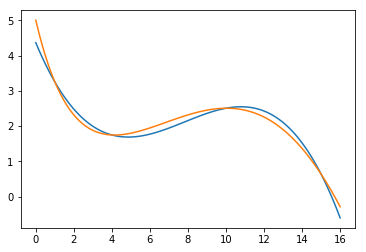

In [20]:
fig = plt.subplots()
x = np.linspace(0, 16, 100)
plt.plot(x, fa_3(x))
plt.plot(x, our_func(x))
plt.show()

#### все графики наглядно

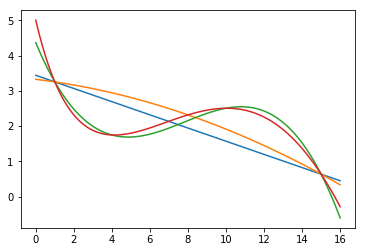

In [21]:
fig = plt.subplots()
x = np.linspace(0, 16, 100)
plt.plot(x, fa_1(x))
plt.plot(x, fa_2(x))
plt.plot(x, fa_3(x))
plt.plot(x, our_func(x))
plt.show()

## Ответ

### искомые коэффициэнты

In [22]:
w_0 = w3[0]
w_1 = w3[1]
w_2=w3[2]
w_3=w3[3]
print w_0.round(2), w_1.round(2), w_2.round(2), w_3.round(2)

4.36 -1.3 0.19 -0.01


$$ w_0 = 4.36 $$
$$ w_1 = -1.3 $$
$$ w_2 = 0.19 $$
$$ w_3 = -0.01 $$

На приведенных графиках видно, что многочлен третьей степени неплохо аппроксимирует функцию.
Графики близки на заданной области [1,15]
Видно, что при увеличении степени многочлена аппроксимация лучше.

### запись в файл

In [23]:
with open('task_second_answer.txt', 'w') as coefficients:
    coefficients.write(str(w_0) + ' ' + str(w_1) + ' ' + str(w_2) + ' ' + str(w_3))